- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
   - [1. Univariate Feature Selection](#1.-Univariate-Feature-Selection)
     - [1.1 Mutual Info Classif](#1.1-Mutual-Info-Classif)
     - [1.2 Chi-squared](#1.2-Chi-squared)
 - [Dimension reduction](#Dimension-reduction)
- [Task B - Predictive Model](#Task-B---Predictive-Model)


In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets

### Banknotes dataset

In [3]:
df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

### Nursery dataset

In [4]:
df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

### Banknotes dataset

In [5]:
df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

### Nursery dataset

In [6]:
df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

#### Nursery dataset

In [7]:
# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

### Nursery dataset

In [10]:
# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

### Banknotes dataset

In [15]:
# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

### Nursery dataset

In [16]:
# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features

### 1. Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** function, if there are negative values.
#### 1.1 Mutual Info Classif

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x108A44F8>)

##### Banknotes dataset

In [18]:
test.fit(X_train1, y_train1)
num_features = len(X_train1.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train1.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.3800563787569369, 'variance of Wavelet Transformed image'), (0.23002605414778188, 'skewness of Wavelet Transformed image'), (0.13381290133398127, 'curtosis of Wavelet Transformed image'), (0.025999674858312227, 'entropy of image')]


##### Nursery dataset

In [19]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.6709055594914262, 'health'), (0.13462850665043646, 'has_nurs'), (0.05484787600307328, 'parents'), (0.01693354476921005, 'social'), (0.01391946086853002, 'housing'), (0.010614752536087568, 'children'), (0.009468014396877056, 'form'), (0.0048567533620076375, 'finance')]


#### 1.2 Chi-squared

In [20]:
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=2)

##### Nursery dataset

In [21]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(2328.5106695680142, 'health'), (1382.5393670468638, 'has_nurs'), (272.22400049403143, 'parents'), (82.37616853342124, 'housing'), (65.99136637836094, 'children'), (54.591070070816016, 'social'), (30.993490104262953, 'form'), (8.353215124118188, 'finance')]


## Dimension reduction

### Banknotes dataset

Explained variance ratio: [0.75048995 0.14883214 0.06921445 0.03146347]


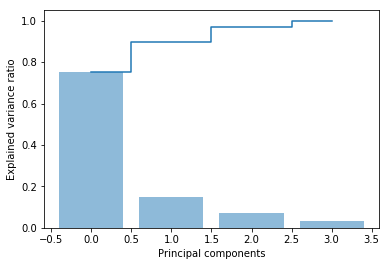

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train1)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

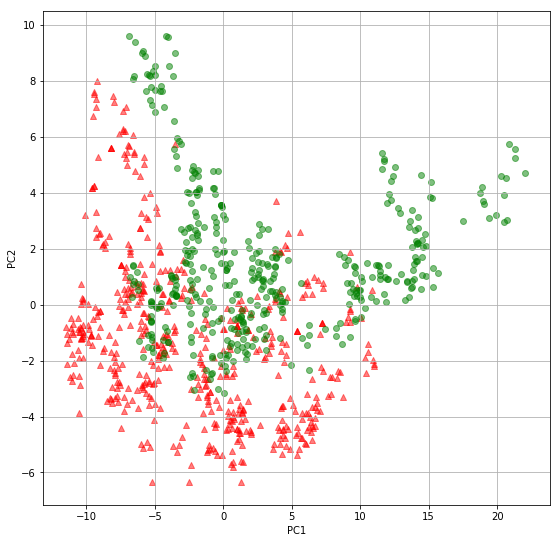

In [23]:
pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train1)
print

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca1[y_train1 == 0, 0], X_train_pca1[y_train1 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca1[y_train1 == 1, 0], X_train_pca1[y_train1 == 1, 1],
              color='green', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()

In [24]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.1375057  -0.81463483  0.5417687   0.15475451]
 [-0.82452609  0.23304948  0.26712712 -0.44100767]]
singular_ values
 [213.73404957  95.18086338]


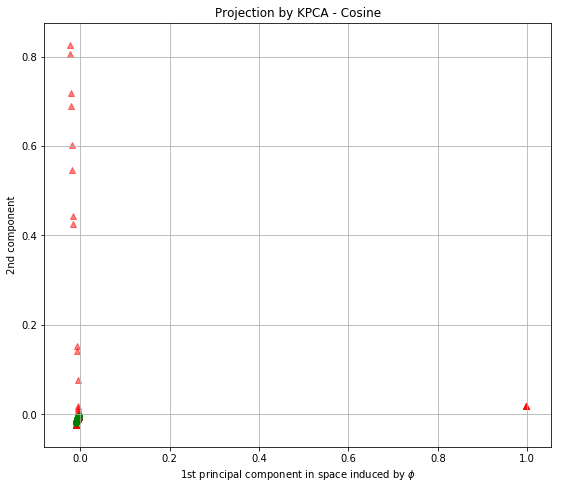

            0         1
0   -0.003259 -0.004373
1   -0.004525 -0.006651
2   -0.003418 -0.004664
3   -0.003561 -0.004879
4   -0.003744 -0.005207
5   -0.003650 -0.005036
6   -0.003492 -0.004765
7   -0.003709 -0.005188
8   -0.004517 -0.006614
9   -0.003909 -0.005505
10  -0.003285 -0.004415
11  -0.003247 -0.004353
12  -0.004477 -0.006540
13  -0.003666 -0.005056
14  -0.003729 -0.005175
15  -0.004859 -0.007542
16  -0.004546 -0.006684
17   0.996311  0.019420
18  -0.003415 -0.004645
19  -0.003283 -0.004414
20  -0.003254 -0.004367
21  -0.003245 -0.004350
22  -0.004522 -0.006630
23  -0.003708 -0.005129
24  -0.004053 -0.005747
25  -0.004654 -0.005056
26  -0.003252 -0.004362
27  -0.003247 -0.004354
28  -0.005278 -0.008264
29  -0.003290 -0.004423
..        ...       ...
930 -0.003366 -0.004559
931 -0.003301 -0.004456
932 -0.003245 -0.004350
933 -0.003307 -0.004454
934 -0.004248  0.013046
935 -0.003309 -0.004457
936 -0.003257 -0.004369
937 -0.023347  0.826264
938 -0.003700 -0.005120
939 -0.004566 -0

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca1 = kpca.fit_transform(X_train1)
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca1[y_train1 == 0, 0], X_train_kpca1[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca1[y_train1 == 1, 0], X_train_kpca1[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.title("Projection by KPCA - Cosine")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

X_train1_v2 = pd.DataFrame(data=X_train_kpca1)
print(X_train1_v2)

### Nursery dataset

Explained variance ratio: [0.26861445 0.17014433 0.16794164 0.09056424 0.09001038 0.08968382
 0.08933976 0.03370138]


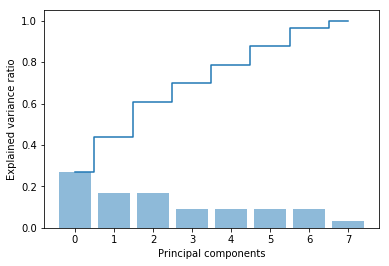

In [26]:
pca = PCA()
principalComponents = pca.fit_transform(X_train2)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [27]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-5.90217248e-03 -9.99970153e-01  2.18753432e-03 -5.50993368e-04
   1.11355290e-05 -3.70101592e-03 -1.51428222e-03  1.94351532e-03]
 [ 4.36087782e-03 -2.29320077e-03 -9.64229226e-01  2.64488555e-01
   1.51704613e-02  1.21207511e-03  7.07480188e-03  1.36480570e-03]
 [-3.42258743e-03  6.95440481e-05  2.64540306e-01  9.64340878e-01
   4.68257244e-03 -7.17618674e-04 -4.20392444e-03 -3.64200309e-03]
 [-5.13358297e-01  3.14549655e-03 -1.53289122e-02  1.46541444e-03
  -5.67755717e-01 -2.87011600e-03 -5.41626208e-01 -3.47134701e-01]
 [-2.40173361e-01  3.17334317e-03 -3.68726455e-03  5.21657335e-03
  -3.36220057e-01  1.23203445e-03 -3.41108464e-03  9.10609026e-01]
 [ 4.68070438e-01 -3.73880110e-03 -4.50446676e-03  7.88711529e-03
  -7.50595902e-01 -2.57579843e-03  4.40776642e-01 -1.52081224e-01]
 [-6.77927996e-01  2.56930266e-03  2.25863037e-03 -6.71007114e-04
   3.08443439e-02  9.11213316e-03  7.15700348e-01 -1.64742487e-01]
 [ 6.17629887e-03 -3.72621443e-03  1.29509149e-03  3.93

In [28]:
# Only two components for illustration
pca = PCA(n_components=7)
X_train_pca2 = pca.fit_transform(X_train2)
print(pca)

print(X_train_pca2)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[ 2.01508812  1.58146891  0.08912183 ...  1.01283078  1.08739502
  -0.88056643]
 [ 0.01880029 -0.1000406   1.59687531 ... -0.55938206  0.47153517
  -0.57075681]
 [-1.97876975 -1.04073255  1.85204438 ...  0.68345888  0.31621763
  -0.83333999]
 ...
 [-1.98562289  1.05712465 -1.83095717 ... -0.23173807  0.45815091
  -0.67336037]
 [ 0.01236406 -0.34465387  0.61706199 ...  0.09901487  1.66119055
   0.01864441]
 [ 1.02263243 -0.85500942 -1.29033803 ... -1.25528835 -0.60622674
   0.19696381]]


In [29]:
'''
pca = PCA(n_components=7)
X_spca2 = pca.fit_transform(X_train2)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1],
              color='green', marker='o', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1],
              color='cyan', marker='x', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1],
              color='blue', marker='s', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1],
              color='yellow', marker='*', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()
'''

"\npca = PCA(n_components=7)\nX_spca2 = pca.fit_transform(X_train2)\n\nfig = plt.figure(figsize=(20, 20))\nax = fig.add_subplot(2,2,1) \n\nax.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1],\n              color='red', marker='^', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1],\n              color='green', marker='o', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1],\n              color='cyan', marker='x', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1],\n              color='blue', marker='s', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1],\n              color='yellow', marker='*', alpha=0.5)\n\nax.set_xlabel('PC1')\nax.set_ylabel('PC2')\n\n# plt.savefig('./figures/half_moon_2.png', dpi=300)\nax.grid()\nplt.show()\n"

In [30]:
#from sklearn.decomposition import KernelPCA

#kpca = KernelPCA(n_components = 7 ,kernel="rbf", fit_inverse_transform=True, gamma=10)
#X_train_kpca2 = kpca.fit_transform(X_train2)

'''
fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()
'''
#X_train2_v2 = pd.DataFrame(data=X_train_kpca2)

'\nfig= plt.figure(figsize=(20, 20))\n\nplt.subplot(2, 2, 1, aspect=\'equal\')\n\nplt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",\n            marker=\'^\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",\n            marker=\'o\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",\n            marker=\'x\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",\n            marker=\'s\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",\n            marker=\'*\', alpha=0.5)\nplt.title("Projection by KPCA")\nplt.xlabel("1st principal component in space induced by $\\phi$")\nplt.ylabel("2nd component")\nplt.grid()\nplt.show()\n'

## Task B - Predictive Model

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, banknotes=0, mlp=0, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    if(banknotes == 1 and mlp == 1): # banknotes dataset and mlp
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif(banknotes == 1 and mlp == 0): # banknotes dataset and svm
        Xpred = np.array([xx1.ravel(), xx2.ravel()] + [np.repeat(0, xx1.ravel().size) for _ in range(2)]).T
        Z = classifier.predict(Xpred)
    else: # nursery dataset
        Xpred = np.array([xx1.ravel(), xx2.ravel()] + [np.repeat(0, xx1.ravel().size) for _ in range(6)]).T
        Z = classifier.predict(Xpred)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP

#### Banknotes dataset

In [32]:
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import accuracy_score

#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter = 500)
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500, alpha=0.0001,
 #   solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
#mlp.fit(X_train1, y_train1)

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
# Código que encontrei online
#y_pred = mlp.predict(X_test1)
#accuracy_score(y_test1, y_pred)

            0         1
0   -0.003259 -0.004373
1   -0.004525 -0.006651
2   -0.003418 -0.004664
3   -0.003561 -0.004879
4   -0.003744 -0.005207
5   -0.003650 -0.005036
6   -0.003492 -0.004765
7   -0.003709 -0.005188
8   -0.004517 -0.006614
9   -0.003909 -0.005505
10  -0.003285 -0.004415
11  -0.003247 -0.004353
12  -0.004477 -0.006540
13  -0.003666 -0.005056
14  -0.003729 -0.005175
15  -0.004859 -0.007542
16  -0.004546 -0.006684
17   0.996311  0.019420
18  -0.003415 -0.004645
19  -0.003283 -0.004414
20  -0.003254 -0.004367
21  -0.003245 -0.004350
22  -0.004522 -0.006630
23  -0.003708 -0.005129
24  -0.004053 -0.005747
25  -0.004654 -0.005056
26  -0.003252 -0.004362
27  -0.003247 -0.004354
28  -0.005278 -0.008264
29  -0.003290 -0.004423
..        ...       ...
930 -0.003366 -0.004559
931 -0.003301 -0.004456
932 -0.003245 -0.004350
933 -0.003307 -0.004454
934 -0.004248  0.013046
935 -0.003309 -0.004457
936 -0.003257 -0.004369
937 -0.023347  0.826264
938 -0.003700 -0.005120
939 -0.004566 -0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


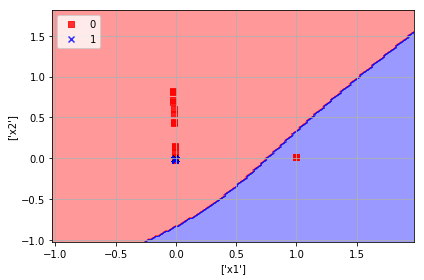

In [34]:
print(X_train1_v2)
mlp.fit(X_train1_v2.values,y_train1.values)
plot_decision_regions(X_train1_v2.values, y_train1.values, classifier=mlp, banknotes=1, mlp=1)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
print('Banknotes dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

Banknotes dataset
the weights are 
 [array([[ 0.00967489, -0.58422577, -0.60199885, -0.21467373,  0.47362489,
         0.25511696,  0.27172269, -0.21260188, -0.60579426, -0.34066642],
       [ 0.45788708,  0.71301928,  0.33068972,  0.19574743,  0.48763174,
        -0.30279877, -0.01723691, -0.26963052,  0.32771525, -0.60043143]]), array([[-0.19845898,  0.500356  , -0.37091847, -0.32969882,  0.0640724 ],
       [-0.32824408, -0.45085172, -0.46386661,  0.46546529,  0.67210372],
       [-0.32291908, -0.24612729,  0.10391599, -0.38559817, -0.00304147],
       [-0.52153803,  0.32554094,  0.48599546,  0.0207757 ,  0.39792227],
       [ 0.00638689, -0.27625302, -0.4592047 , -0.51980663,  0.30445507],
       [ 0.44989347,  0.37718935,  0.49140867,  0.30819623,  0.45975746],
       [ 0.63679437, -0.31730636, -0.06759547,  0.61887985,  0.47607654],
       [ 0.16569206, -0.23893914,  0.43013967,  0.41421347, -0.45922134],
       [ 0.42862574, -0.42116954, -0.62896282,  0.09055403,  0.03383422],
 

#### Nursery dataset

In [36]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
mlp.fit(X_train2.values,y_train2.values)
#plot_decision_regions(X_train2.values, y_train2.values, classifier=mlp)
#plt.xlabel(['x1'])
#plt.ylabel(['x2'])
#plt.legend(loc='upper left')
#plt.grid()
#plt.tight_layout()
#plt.show()

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
print('Nursery dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

Nursery dataset
the weights are 
 [array([[ 0.12844576,  0.07770219, -0.08546002,  0.9453078 ,  0.06118275,
        -0.92633185,  0.01090577,  0.14057183, -0.02004764,  0.49121264],
       [-0.26503109,  0.10734297,  0.02191066, -0.28518979, -0.01575924,
        -0.4301291 ,  0.16056861, -0.05856809,  0.06621664,  0.98735485],
       [ 0.22809915, -0.77641368, -0.44343996, -0.12867613,  0.05516064,
         0.12520092, -0.07755651,  0.09919171,  0.0335063 , -0.13014741],
       [ 0.34597917,  0.11150688, -0.5777733 , -0.0647824 ,  0.06142838,
         0.1600923 , -0.04290307,  0.00628317,  0.06504692, -0.10579442],
       [ 0.46296633, -0.79200696,  0.16239672, -0.11226023,  0.48913615,
         0.21783572, -0.14340524, -0.84449809,  0.21989328, -0.20523806],
       [ 0.0356615 ,  0.72751507,  0.77781722, -0.20824809,  0.6118296 ,
         0.19227174, -0.44690002,  1.02348703,  0.15507888, -0.27776839],
       [ 0.28134958,  0.01523573, -0.13892136,  0.17558134, -0.18485999,
        -0

### SVM

#### Banknotes dataset

In [39]:
from sklearn.svm import SVC

svm=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=2000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


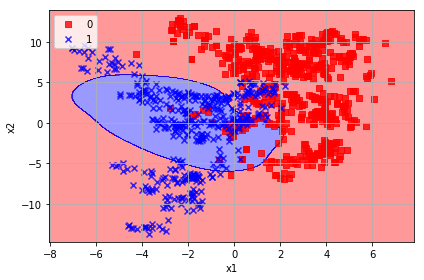

In [40]:
svm=svm.fit(X_train1.values, y_train1.values)
plot_decision_regions(X_train1.values, y_train1.values, classifier=svm, banknotes=1, mlp=0)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
print('Banknotes dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

Banknotes dataset
dual coef 
 [[-3.22629078e-01 -3.09186726e-01 -1.49102870e-01 -8.63622384e-01
  -6.17763335e-01 -5.13543879e-01 -1.96431611e-01 -1.64792128e-01
  -4.95607324e-01 -4.75183007e-01 -3.35820993e-01 -1.16610622e-01
  -4.26411892e-01 -1.22630349e-01 -1.36373705e-01 -4.68601887e-01
  -1.92183722e-01 -1.40145659e-01 -3.69105787e-01 -5.19326311e-01
  -7.06249609e-02 -1.41256151e-01 -4.43149575e-01 -4.31703883e-01
  -6.20080126e-01 -1.67468787e-01 -7.23635124e-01 -2.31674550e-01
  -1.41056170e-01 -3.11424644e-01 -1.49070311e-01 -1.59914306e-01
  -3.48436328e-01 -4.37453341e-01 -3.13691632e-02 -1.82777712e-01
  -2.15688453e-01 -4.00842873e-01 -8.19433272e-02 -1.17497957e-01
  -4.94366261e-01 -4.71064645e-01 -5.98138575e-01 -1.04485585e-01
  -5.87008178e-02 -3.49326950e-01 -3.72387051e-01 -3.11988971e-01
  -3.56086037e-02 -1.78411437e-01 -1.00000000e+00 -4.17031879e-01
  -2.67826554e-01 -1.86632830e-01 -6.21095778e-01 -1.63706050e-01
  -9.79386742e-02 -1.71565029e-01 -2.52248574e

#### Nursery dataset

In [42]:
svm=SVC(C=1.0,kernel='rbf', max_iter=4000, tol=1e-05, verbose=0)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=4000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

In [43]:
svm=svm.fit(X_train2.values, y_train2.values)
#plot_decision_regions(X_train2.values, y_train2.values, classifier=svm)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.legend(loc='upper left')
#plt.grid()
#plt.tight_layout()
#plt.show()

C:\Users\NelsonCosta\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [44]:
print('Nursery dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

Nursery dataset
dual coef 
 [[ 0.10341707  0.          0.         ... -0.33269826 -0.07250174
  -0.        ]
 [ 0.00889485  0.14908641  0.         ... -1.         -1.
  -1.        ]
 [ 0.9129911   0.          0.33290763 ... -0.         -0.
  -0.        ]
 [ 0.11254619  0.          0.         ... -0.         -0.
  -0.        ]]
support vectors 
 [[1. 5. 1. ... 2. 3. 3.]
 [2. 1. 1. ... 1. 1. 3.]
 [3. 1. 1. ... 1. 3. 3.]
 ...
 [1. 1. 1. ... 2. 1. 1.]
 [1. 1. 1. ... 1. 2. 1.]
 [1. 3. 2. ... 1. 2. 1.]]
index of support vectors 
  [  27   84  122 ... 8848 8939 9014]
bias [ 0.31398584  0.89560818  0.23151832  0.56953228  1.15773937 -0.25814474
  3.70914447 -0.88134047 -1.12442017  1.03646128]
the classifier 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=4000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)
